# Importacion de la base de datos y los archivos de configuracion

In [1]:
# Download the files from the cloud where we store them
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2" -O dataset.zip && rm -rf /tmp/cookies.txt 



--2022-01-31 15:18:42--  https://docs.google.com/uc?export=download&confirm=pBHb&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2
Resolving docs.google.com (docs.google.com)... 142.250.188.206, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-2s-docs.googleusercontent.com/docs/securesc/2m1vamhp0rgpmksfen4ni9h4b454v42e/lg9ckam4l446v12eplh61beodbou55jv/1643642250000/08648504914934798558/01561800646005705428Z/1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2?e=download [following]
--2022-01-31 15:18:42--  https://doc-00-2s-docs.googleusercontent.com/docs/securesc/2m1vamhp0rgpmksfen4ni9h4b454v42e/lg9ckam4l446v12eplh61beodbou55jv/1643642250000/08648504914934798558/01561800646005705428Z/1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2?e=download
Resolving doc-00-2s-docs.googleusercontent.com (doc-00-2s-docs.googleusercontent.com)... 172.217.0.33, 2607:f8b0:4004:800::2001
Connecting to doc-0

In [2]:
# Clone repository where function files are found
!git clone https://github.com/CamiloSaboA-csv/digitalizador_manuscritos.git

Cloning into 'digitalizador_manuscritos'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


# Descompresion de los archivos

tener un poco de paciencia, esto puede tardar un poco, aproximadamente 4 minutos.

In [3]:
%%time
!unzip "dataset.zip" -d "/content/dataset/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/dataset/uppercase/validation/U/002203.png  
  inflating: /content/dataset/uppercase/validation/U/002204.png  
  inflating: /content/dataset/uppercase/validation/U/002205.png  
  inflating: /content/dataset/uppercase/validation/U/002206.png  
  inflating: /content/dataset/uppercase/validation/U/002207.png  
  inflating: /content/dataset/uppercase/validation/U/002208.png  
  inflating: /content/dataset/uppercase/validation/U/002209.png  
  inflating: /content/dataset/uppercase/validation/U/002210.png  
  inflating: /content/dataset/uppercase/validation/U/002211.png  
  inflating: /content/dataset/uppercase/validation/U/002212.png  
  inflating: /content/dataset/uppercase/validation/U/002213.png  
  inflating: /content/dataset/uppercase/validation/U/002214.png  
  inflating: /content/dataset/uppercase/validation/U/002215.png  
  inflating: /content/dataset/uppercase/validation/U/002216.png  
  inflati

# Librerias necesarias

In [4]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras


Importacion de funciones implementadas en archivos adicionales con el fin de brindar una mejor organización

In [5]:
# importing sys
import sys
  
# adding digitalizador_manuscritos to the system path
sys.path.insert(0, '/content/digitalizador_manuscritos')
  
# function
from _01_functions import *


# Cargaremos los datos

In [6]:
# Load the dataset image

#Local enviroment
# dir = r"Q:\One_drive_UDEA\1_UDEA_Esp_Analitica\0_Monografia\test"

# dir = "/content/dataset"



#Colab enviroment
# define the path where the dataset files are located

dir_lowecase_train  = "/content/dataset/lowercase/train"
dir_lowecase_test  = "/content/dataset/lowecase/test"
dir_lowecase_validation  = "/content/dataset/lowecase/validation"

# dir_uppercase_train = "/content/dataset/uppercase/train"
# dir_uppercase_test = "/content/dataset/uppercase/test"
# dir_uppercase_validation = "/content/dataset/uppercase/validation"

# dir_numbers_train  = "/content/dataset/numbers/train"
# dir_numbers_test  = "/content/dataset/numbers/test"
# dir_numbers_validation  = "/content/dataset/numbers/validation"


In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    directory = dir_lowecase_train,
    target_size=(300, 300))

Found 111713 images belonging to 26 classes.


## Separacion de los datos
Dado que el dataset inicial ya tena una separacion inicial, simplemente asignamos los datos a las variables correspondientes.

inicialmente solo vamos a cargar los datos de entrenamiento

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    directory = dir_lowecase_train,
    target_size=(300, 300))

# validation = train_datagen.flow_from_directory(
#     directory =dir_lowecase_validation ,
#     target_size=(300, 300))

# test = train_datagen.flow_from_directory(
#     directory = dir_lowecase_test,
#     target_size=(300, 300))

Found 111713 images belonging to 26 classes.


## Exploración de los datos

In [9]:
#show the len of the dataset and the number of images in each class
print('Numero de muestras:', train.samples )
print(f'Son {train.num_classes} clases diferentes: {train.class_indices}') 
#print('', len(train))
print('tamaño de las imagenes:', train.image_shape)

Numero de muestras: 111713
Son 26 clases diferentes: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
tamaño de las imagenes: (300, 300, 3)


Verificamos el balance de los datos con el fin de conocer un poco de nuestro dataset.

(array([ 6808.,  3445.,  1811.,  6967., 17092.,  1679.,  2474.,  5925.,
         2454.,  1989.,  1709., 10326.,  1634.,  7813.,  1734.,  1532.,
         2005.,  9647.,  1764., 12581.,  1782.,  1792.,  1689.,  1791.,
         1562.,  1708.]),
 array([ 0.        ,  0.96153846,  1.92307692,  2.88461538,  3.84615385,
         4.80769231,  5.76923077,  6.73076923,  7.69230769,  8.65384615,
         9.61538462, 10.57692308, 11.53846154, 12.5       , 13.46153846,
        14.42307692, 15.38461538, 16.34615385, 17.30769231, 18.26923077,
        19.23076923, 20.19230769, 21.15384615, 22.11538462, 23.07692308,
        24.03846154, 25.        ]),
 <a list of 26 Patch objects>)

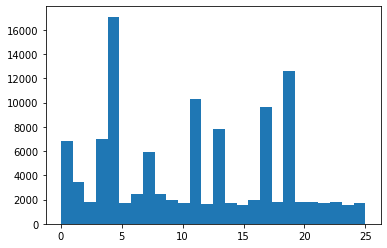

In [10]:
plt.hist(train.classes, bins=len(train.class_indices))

Ploteamos algunas imagenes de los datos para verificar que se hayan cargado correctamente.

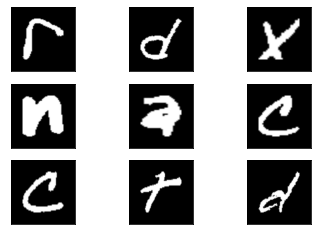

In [11]:
plot_images(train) # ploting some images for verification 

## Creacion del modelo

In [12]:


model = tf.keras.models.Sequential([
    #input shape is the desired size of the image 300x300 with 3 bytes color

    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # 52 output neuron.
    tf.keras.layers.Dense(52, activation='softmax')
])

